In [1]:
import pandas as pd
import statsmodels.api as sm
import altair as alt
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [2]:
raw = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190517")

In [3]:
raw = raw[0]

In [4]:
raw.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'marketcap']

In [5]:
raw['date'] = pd.to_datetime(raw['date'])

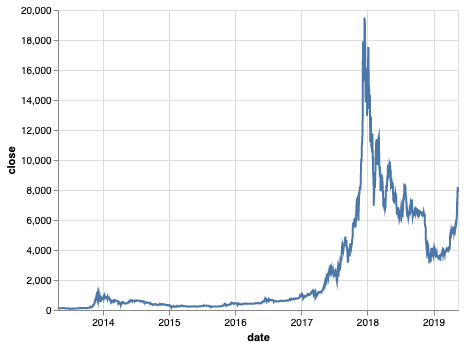

In [6]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')


line = alt.Chart(raw).mark_line().encode(
    x = 'date',
    y = 'close'
)

selectors = alt.Chart(raw).mark_point().encode(
    x='date',
    opacity=alt.value(0),
).add_selection(
    nearest
)


points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'close', alt.value(' '))
)


rules = alt.Chart(raw).mark_rule(color='gray').encode(
    x='date',
).transform_filter(
    nearest
)

alt.layer(
    line, selectors, points, rules, text
)

In [7]:
df = raw.set_index('date')

In [8]:
res = sm.tsa.seasonal_decompose(df['close'], freq = 365)

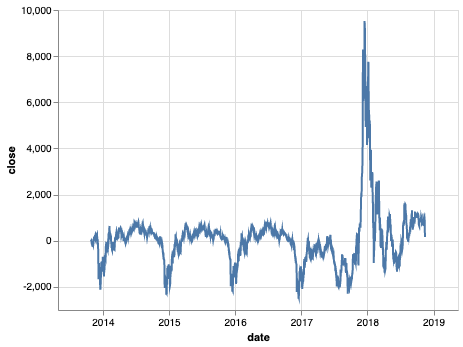

In [12]:
alt.Chart(pd.DataFrame(res.resid).reset_index()).mark_line().encode(
    x = 'date',
    y = 'close'
)

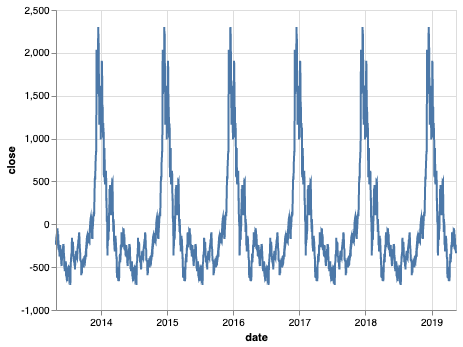

In [9]:
alt.Chart(pd.DataFrame(res.seasonal).reset_index()).mark_line().encode(
    x = 'date',
    y = 'close'
)

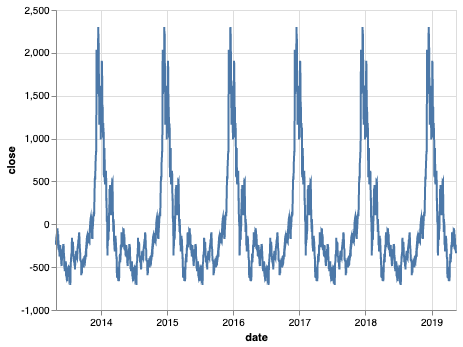

In [10]:
alt.Chart(pd.DataFrame(res.seasonal).reset_index()).mark_line().encode(
    x = 'date',
    y = 'close'
)